In [18]:
from numpy.random import seed

class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
     
    def pure_complete(self, X, y):
        tp = sum(np.where(y+self.predict(X)==2,1,0)) #both 1
        tn = sum(np.where(y+self.predict(X)==-2,1,0)) # both -1
        fp = sum(np.where(y-self.predict(X)==-2,1,0)) #predicted 1 actually -1
        fn = sum(np.where(y-self.predict(X)==2,1,0)) # predicted -1 actually 1
        purity = tp / (tp+fp)
        completeness = tp / (tp+fn)
        print("Weights: ", self.w_)
        print("Purity: ", purity)
        print("Completeness: ", completeness)
    
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
            #self.pure_complete(self, X, y) #for each iteration, print weights, purity, and completeness
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    

In [19]:
import pandas as pd
import numpy as np

""" Import SN dataset, load into DF, create data subset and labels """
filename = 'SN_classify.csv'
df = pd.read_csv(filename)
X = df.iloc[:, [0,1,2]].values
y = df.iloc[:, 3].values
y = np.where(y == 0, -1, 1)

In [22]:
ii = 0
while ii < 16:
    ii+=1
    ada = AdalineSGD(n_iter=ii, eta=0.01, random_state=1)
    ada.fit(X, y)
    print("Iteration #: ", ii)
    print("Weights: ", ada.w_)
    #print("Costs: ", ada.cost_)
    #print(y[0:20])
    #print(ada.predict(X[0:20]))
    tp = sum(np.where(y+ada.predict(X)==2,1,0)) #both 1
    tn = sum(np.where(y+ada.predict(X)==-2,1,0)) # both -1
    fp = sum(np.where(y-ada.predict(X)==-2,1,0)) #predicted 1 actually -1
    fn = sum(np.where(y-ada.predict(X)==2,1,0)) # predicted -1 actually 1

    purity = tp / (tp+fp)
    completeness = tp / (tp+fn)
    fpr = fp / (fp+tn)

    print("Purity: ", purity)
    print("Completeness: ", completeness)

Iteration #:  1
Weights:  [-0.20146545  0.32381381  1.30610979  1.30610979]
Purity:  0.866912151499
Completeness:  0.966002344666
Iteration #:  2
Weights:  [-0.24309367  0.21776036  1.61542823  1.61542823]
Purity:  0.864779874214
Completeness:  0.967174677608
Iteration #:  3
Weights:  [-0.27842466  0.11451856  1.72200527  1.72200527]
Purity:  0.868358445678
Completeness:  0.962778429074
Iteration #:  4
Weights:  [-0.37429441  0.09851647  1.7394453   1.7394453 ]
Purity:  0.883842554363
Completeness:  0.941090269637
Iteration #:  5
Weights:  [-0.35278521  0.09279578  1.7695347   1.7695347 ]
Purity:  0.877678329265
Completeness:  0.948417350528
Iteration #:  6
Weights:  [-0.30592968  0.05739193  1.74448247  1.74448247]
Purity:  0.872170439414
Completeness:  0.959847596717
Iteration #:  7
Weights:  [-0.31432878  0.03529137  1.75577359  1.75577359]
Purity:  0.872863247863
Completeness:  0.957796014068
Iteration #:  8
Weights:  [-0.39053289  0.0488366   1.74282236  1.74282236]
Purity:  0.886

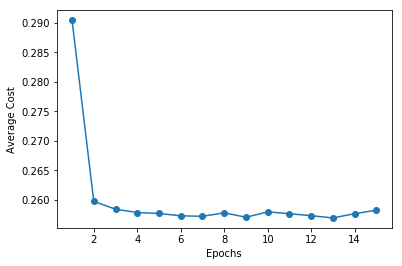

In [15]:
from matplotlib import pyplot as plt

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

In [23]:
tp = sum(np.where(y+ada.predict(X)==2,1,0)) #both 1
tn = sum(np.where(y+ada.predict(X)==-2,1,0)) # both -1
fp = sum(np.where(y-ada.predict(X)==-2,1,0)) #predicted 1 actually -1
fn = sum(np.where(y-ada.predict(X)==2,1,0)) # predicted -1 actually 1

purity = tp / (tp+fp)
completeness = tp / (tp+fn)
fpr = fp / (fp+tn)

print("Purity: ", purity)
print("Completeness: ", completeness)

Purity:  0.874764848159
Completeness:  0.953985932005
